In [2]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [8]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\RP_curve.xlsx")
#batch = batch.sort_values(by =["(za-xa) (R)"])
print(batch)
#print(batch["ret. O2%"])

    (za-xa) (R)  ya-za (P)  P/R (za-xa)/(ya-za)     Cp/cr  Unnamed: 4      R  \
0         0.005      0.140             0.035714  0.415493   28.000000  28400   
1         0.006      0.141             0.042553  0.492063   23.500000  25200   
2         0.006      0.138             0.043478  0.490756   23.000000  23800   
3         0.010      0.182             0.054945  0.510101   18.200000  39600   
4         0.013      0.178             0.073034  0.593023   13.692308  34400   
5         0.013      0.210             0.061905  0.590164   16.153846  48800   
6         0.013      0.180             0.072222  0.621951   13.846154  32800   
7         0.015      0.231             0.064935  0.655172   15.400000  58000   
8         0.017      0.205             0.082927  0.682243   12.058824  42800   
9         0.018      0.209             0.086124  0.733333   11.611111  42000   
10        0.019      0.227             0.083700  0.755814   11.947368  51600   
11        0.022      0.228             0

In [45]:
#line fit
Cp = 42.92
x = np.linspace(0,0.9,50)
y = Cp/400*x


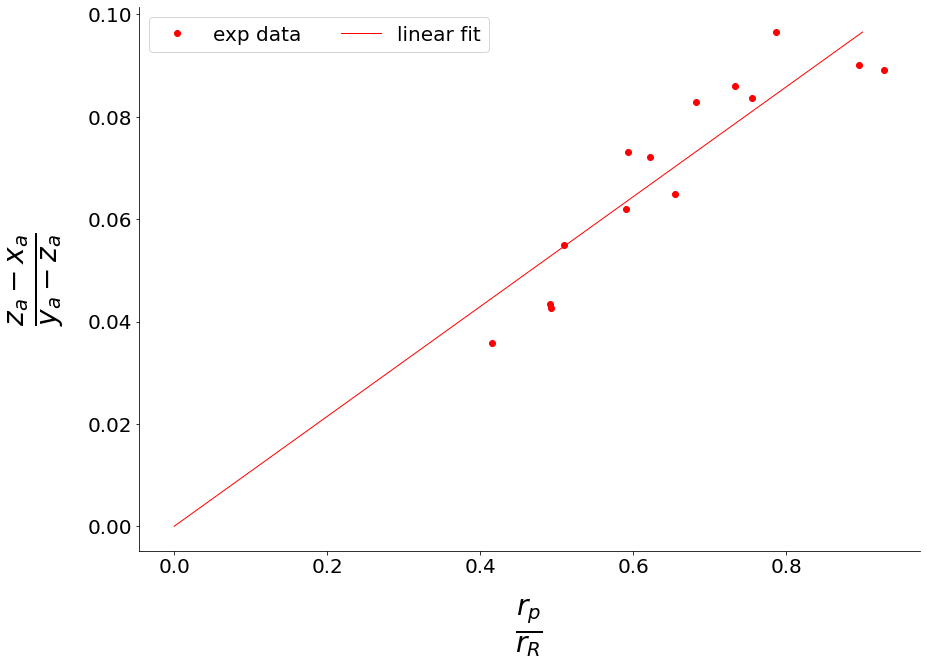

In [47]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
n = 1
lw = 6

ax1.plot(batch["Cp/cr"],batch["P/R (za-xa)/(ya-za)"],'ro', markersize = lw,label = "exp data")
ax1.plot(x,y,'r-', linewidth = 1,label = "linear fit")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
ax1.set_ylabel(r"$ \frac{z_a - x_a} {y_a - z_a}$", fontsize = 40,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r"$\frac{r_p} {r_R}$",fontsize = 40,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

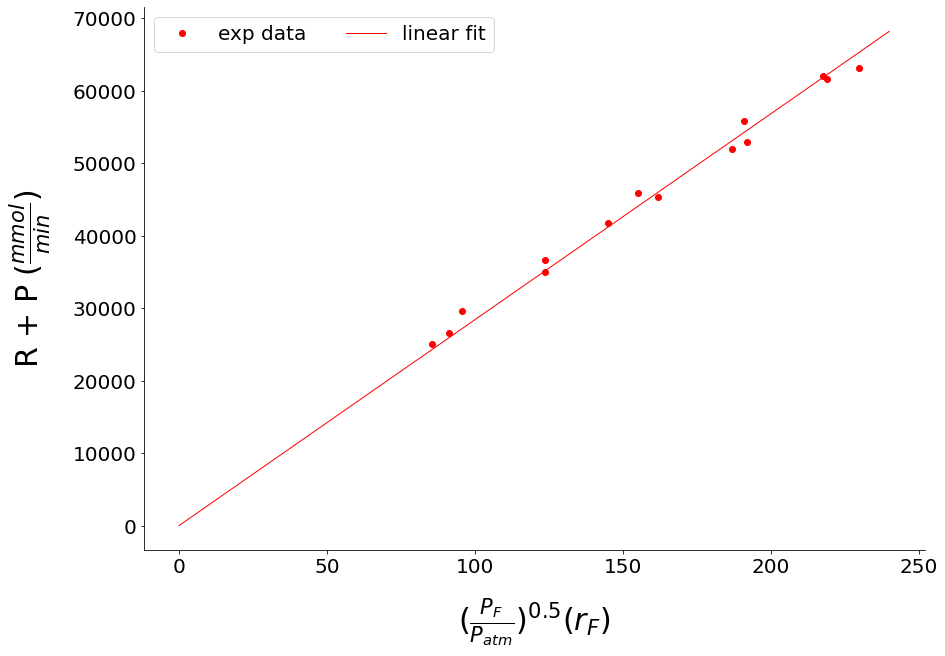

In [48]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
n = 1
lw = 6
x = np.linspace(0,240,50)
y = x*284.02
ax1.plot(batch["(pexit/Patm)^61/2*feed rot reading"],batch["R+P"],'ro', markersize = lw, label = "exp data")
ax1.plot(x,y,'r-', linewidth = 1, label = "linear fit")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)
#ax1.plot(x,y,'ro', markersize = lw)

#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
ax1.set_ylabel(r"R + P $ (\frac{mmol} {min}$)", fontsize = 30,labelpad=20)
#ax2.set_ylabel(r" N2% recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r"$(\frac{P_F} {P_{atm}})^{0.5}$$(r_F)$",fontsize = 30,labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')